In [2]:
'''One class SVM implementation'''

import matplotlib.pyplot as plt
import csv
from datetime import datetime
from dateutil.parser import parse
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *
import matplotlib

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris
dataset = load_boston()
import pandas as pd # conventional alias
import matplotlib.pyplot as plt
import csv
from datetime import datetime
from dateutil.parser import parse
import pandas as pd

from mpl_toolkits import mplot3d
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from sklearn import svm

from pandas import Series, DataFrame, Panel

In [4]:
df = pd.read_csv('orders11a.csv',low_memory=False, parse_dates= ['Timestamp'])
df.head()


,States,Timestamp
0,2312,2018-03-08 17:31:23
1,3313,2018-03-08 17:31:24
2,4314,2018-03-08 17:31:25
3,5315,2018-03-08 17:31:26
4,6316,2018-03-08 17:31:27


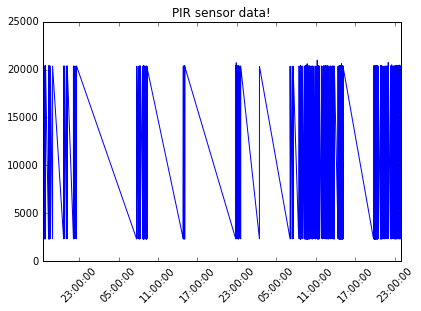

In [5]:
'''Scale within 0 and 1'''
#df['ScaledStates'] = df['States'] / df['States'].max()

'''Plot'''

plt.plot(df['Timestamp'], df['States'])
plt.title('PIR sensor data!', color='black')
plt.tight_layout()
plt.xticks(rotation=45)
plt._show()

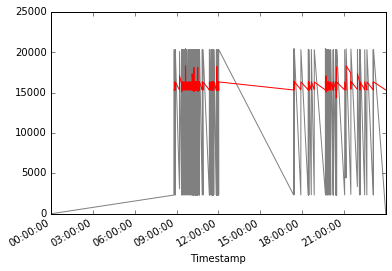

In [7]:
#df['time'] = (df['States'] - df['States'].mean() )/ df['States'].std()
#df['States'].mean()
#df['States'].std()
#zo = df['States'] - df['States'].mean() 
#z = zo / df['States'].std()

'''Read CSV file and set index to timestamp'''
df = pd.read_csv('orders12.csv',low_memory=False, parse_dates= ['Timestamp'])
df = df.set_index('Timestamp')
#df.head()

r = df.rolling(window = 20)
df.head()
df['States'].plot(color = 'gray')
#r.min()['States'].plot(color = 'red')
#r.max()['States'].plot(color = 'green')
#r.mean()['States'].plot(color = 'blue')
r.quantile(.75)['States'].plot(color = 'red')

In [9]:

#df = pd.read_csv('datasum.csv',low_memory=False)

target = df['target'] = 1

In [10]:
'''Test data'''

df1 = pd.read_csv('data_test1.csv',low_memory=False)

#print(X.shape)
#print(X_test.shape)

#x_df = df1.replace(np.nan, 1)

#x_df.head(100) 
#date = pd.date_range('2018-03-01 01:00:00', '2018-03-05 17:00:00', freq = '60s')
#date


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.hist(df['ScaledStates'], 80, normed=True)
#plt.legend(loc='upper left')
plt.ylabel('Metrics')
plt.xlabel('Time')
plt.title('Normalized PIR motion sensor data')
plt.show()

In [11]:
y_train = df['target']  

X = df.drop('target', axis=1)  

#y_test = x_df['target']  

#X_test = df1.drop('target', axis=1) 


KeyError: 'Hourly'

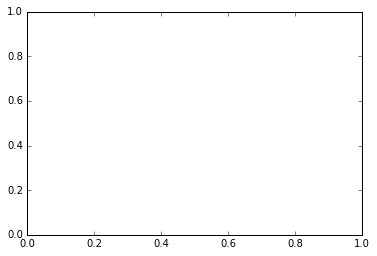

In [12]:


fig = plt.figure()
ax = fig.add_subplot(111)


x = df['Hourly']
y = df['Count']
#z = df['Day']

x1 = df1['Hourly']
y1 = df1['Count']
#z1 = df1['Day']

#ax = plt.axes(projection='3d')
#ax.scatter(x1, y1, s= 30, c='r', marker = "s", label ='Test' )
ax.scatter(x, y, s= 30, c='b', marker = "s", label ='Train' )


plt.legend(loc='upper left')
plt.ylabel('States')
plt.xlabel('Hour')
plt.title('PIR motion sensor training data')

plt.show()


In [13]:
#from sklearn.model_selection import train_test_split  

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [14]:


model = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma='auto') 
model.fit(X,y_train)



TypeError: float() argument must be a string or a number

In [15]:
#from sklearn.model_selection import GridSearchCV
#model = svm.OneClassSVM()
#optimizer = ['linear', 'poly', 'rbf']
#param_grid = dict(optimizer=optimizer)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#grid
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#z = model.decision_function(X)
#plt.plot(z)

In [16]:
y_pred_train = model.predict(X)
y_pred_test = model.predict(X_test)
#y_pred_test


NotFittedError: This OneClassSVM instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [17]:
n_error_train = y_pred_train[y_pred_train == -1].size
print('Training error size:', n_error_train) 

n_error_test = y_pred_test[y_pred_test == -1].size
print('Test error size:', n_error_test)

NameError: name 'y_pred_train' is not defined

In [18]:

from sklearn import metrics  

targs = y_test
preds = y_pred_test

print("accuracy: ", metrics.accuracy_score(targs, preds))  
print("precision: ", metrics.precision_score(targs, preds))  
print("recall: ", metrics.recall_score(targs, preds))  
print("f1: ", metrics.f1_score(targs, preds))  
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))



NameError: name 'y_test' is not defined

NameError: name 'x' is not defined

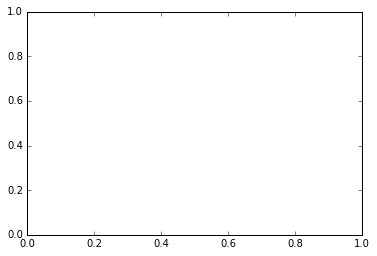

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y, s= 30, c= y_pred_train, marker = "s", label ='Test' )
plt.show()

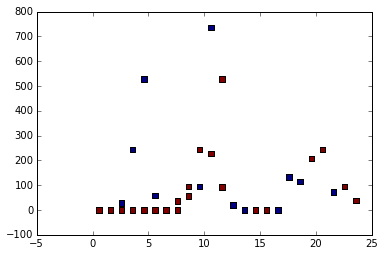

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x1, y1, s= 30, c=y_pred_test, marker = "s", label ='Test' )
plt.show()

In [119]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test)) 

[[ 4  0]
 [13 31]]
             precision    recall  f1-score   support

       -1.0       0.24      1.00      0.38         4
        1.0       1.00      0.70      0.83        44

avg / total       0.94      0.73      0.79        48



In [ ]:
'''Read CSV file and set index to timestamp'''
df = pd.read_csv('orders12t.csv',low_memory=False, parse_dates= ['Timestamp'])
df = df.set_index('Timestamp')

days = ['2018-03-12 00:00:00','2018-03-12 08:48:35','2018-03-12 08:48:36']
days2 = df[(df.index >= '2018-03-12 00:00:00') & (df.index <= '2018-03-12 08:48:37')]


days2
dfList = (df.index ).tolist()



dfList2 = pd.date_range('2018-03-12 08:48:35', '2018-03-12 08:48:38', freq='1s')
df['States'][pd.DatetimeIndex(df.index).isin(dfList2)] = -1

df

In [ ]:


def calculate_taxes(price):
    taxes = price * 0.12
    return taxes

df['taxes'] = df.price.apply(calculate_taxes)
df['profitable'] = np.where(df['price']>=15.00, True, False)

In [ ]:
'''
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
#df

x = []
y = []

with open('trigger1.csv', 'r') as csvfile:
    plots= csv.reader(csvfile, delimiter=',')
    for row in plots:
        y.append(row[0])
        x.append(row[1])
        

#data = {'date': x,'value':y}
#df = pd.DataFrame(data, columns = ['date', 'value'])




#print(df.date)

#plt.plot(df['date'], df['value'], '*')
#plt.xticks(rotation='vertical')
#plt.show()
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt


headers = ['Sensor Value','Date']
df = pd.read_csv('trigger.csv', parse_dates= True, names=headers, infer_datetime_format=True)


#f = plt.figure(figsize=(10, 10))
df.plot(x='Date', y='Sensor Value',) # figure.gca means "get current axis"

plt.title('Sensor trigger with dates!', color='black')
plt.tight_layout()
plt.xticks(rotation=25)
plt._show()

headers = ['Sensor Value','date']
df = pd.read_csv('trigger1.csv', parse_dates= True, names=headers, infer_datetime_format=True)


#df.dropna()
#print(df)
#df.head()



#print(df)
#df.plot(x='date',y='Sensor Value', kind='line')
#plt.title('Motion sensor data visualization between 08.03.18 and 09.03.18', color='black')
#plt.xlabel('Date')
#plt.ylabel('States')
#plt.tight_layout()
#plt.xticks(rotation=25)

#plt.grid(True)
#plt._show()
import plotly.plotly as py
from plotly.graph_objs import *

trace0 = Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)

data = Data([trace0])

py.iplot(data, filename = 'basic-line')'''